# Exploration des donnés avant de modéliser nos données

#### Nous allons plusieurs questions et points à explorer avant de définitivement lancer un modèle cible. Réflexions :


1. Nous prénons le CO2 comme référence cible. Il y a des données entre 2014 et 2019, même s'ils éxistent de trous toute au longue de cette période.

2. Pour voir où l'interpolation a de sense, nous allons explorer la taille des trous (valeur manquantes) des variales. Quand ils sont trop grandes, ça n'a pas de sense. Par contre si nous retrouvons des manques d'une ou deux heures on pourrait les intepoler. 

3. Les températures externes "ext" éxistent entre 2014 et 2017. Nous pourrons tester notre future modèle sans elle entre 2014 et 2019 et avec elles entre 2014 et 2017.

4. Nous pouvons écarter ext_so2 et ext_co parce qu'il n'y a pas assez de données. 

5. Nous pouvons envisager de prédire des pics également.

6. Etant notre cible le CO2 (qui devrait être lié au nombre des personnes, nous porrons envisager également de predire NO2 ou NO.

## Libraries à importer

In [42]:
library("tidyverse")

## Variables globales

In [43]:
#DATA_PATH="D://Jaime//Projet//QAIR//Data//Prepared//"
DATA_PATH<-"C://Formation IA//CEPE//Projet//QAIR//Data//Prepared//"
DATA_FILE_IN<-"DataCorrelated.csv"
DATA_FILE_OUT<-"data_model_restant_trous.csv"

## Lecture des données

D'abord, nous allons récupérer les données prépares suite au travail d'exploration et préparation des données.

In [44]:
fichier_donnees<-paste(DATA_PATH,DATA_FILE_IN,sep="")
df<-read.csv(fichier_donnees)

bien lu?

In [45]:
df

X,Index,Date_Heure_Locale,Heure_Local,Timestamp,Annee,Mois,Heure,Semaine_de_lannee,Jour_de_la_Semaine,...,no,no2,humidite,particules_fines,ext_pm25,ext_pm10,ext_o3,ext_no2,ext_so2,ext_co
1,1,2013-01-01 01:00:00,1,2013-01-01 00:00:00,2013,1,0,1,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,2013-01-01 02:00:00,2,2013-01-01 01:00:00,2013,1,1,1,2,...,23,41,65.6,26,NA,NA,NA,NA,NA,NA
3,3,2013-01-01 03:00:00,3,2013-01-01 02:00:00,2013,1,2,1,2,...,43,61,65.0,18,NA,NA,NA,NA,NA,NA
4,4,2013-01-01 04:00:00,4,2013-01-01 03:00:00,2013,1,3,1,2,...,22,52,63.3,45,NA,NA,NA,NA,NA,NA
5,5,2013-01-01 05:00:00,5,2013-01-01 04:00:00,2013,1,4,1,2,...,27,56,63.7,22,NA,NA,NA,NA,NA,NA
6,6,2013-01-01 06:00:00,6,2013-01-01 05:00:00,2013,1,5,1,2,...,27,57,63.3,15,NA,NA,NA,NA,NA,NA
7,7,2013-01-01 07:00:00,7,2013-01-01 06:00:00,2013,1,6,1,2,...,20,50,63.2,17,NA,NA,NA,NA,NA,NA
8,8,2013-01-01 08:00:00,8,2013-01-01 07:00:00,2013,1,7,1,2,...,24,51,63.7,17,NA,NA,NA,NA,NA,NA
9,9,2013-01-01 09:00:00,9,2013-01-01 08:00:00,2013,1,8,1,2,...,10,37,64.1,20,NA,NA,NA,NA,NA,NA
10,10,2013-01-01 10:00:00,10,2013-01-01 09:00:00,2013,1,9,1,2,...,11,40,64.0,13,NA,NA,NA,NA,NA,NA


## Exploration des données

### Première exploration

A première vue

In [46]:
head(df)

X,Index,Date_Heure_Locale,Heure_Local,Timestamp,Annee,Mois,Heure,Semaine_de_lannee,Jour_de_la_Semaine,...,no,no2,humidite,particules_fines,ext_pm25,ext_pm10,ext_o3,ext_no2,ext_so2,ext_co
1,1,2013-01-01 01:00:00,1,2013-01-01 00:00:00,2013,1,0,1,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,2013-01-01 02:00:00,2,2013-01-01 01:00:00,2013,1,1,1,2,...,23,41,65.6,26,NA,NA,NA,NA,NA,NA
3,3,2013-01-01 03:00:00,3,2013-01-01 02:00:00,2013,1,2,1,2,...,43,61,65.0,18,NA,NA,NA,NA,NA,NA
4,4,2013-01-01 04:00:00,4,2013-01-01 03:00:00,2013,1,3,1,2,...,22,52,63.3,45,NA,NA,NA,NA,NA,NA
5,5,2013-01-01 05:00:00,5,2013-01-01 04:00:00,2013,1,4,1,2,...,27,56,63.7,22,NA,NA,NA,NA,NA,NA
6,6,2013-01-01 06:00:00,6,2013-01-01 05:00:00,2013,1,5,1,2,...,27,57,63.3,15,NA,NA,NA,NA,NA,NA


##### Nombre de registres

In [47]:
nrow(df)

[1] 70152

##### Résumée des variables

In [48]:
summary(df)

       X             Index                 Date_Heure_Locale  Heure_Local   
 Min.   :    1   Min.   :    1   2013-10-27 02:00:00:    2   Min.   : 0.00  
 1st Qu.:17539   1st Qu.:17539   2014-10-26 02:00:00:    2   1st Qu.: 5.75  
 Median :35077   Median :35077   2015-10-25 02:00:00:    2   Median :11.50  
 Mean   :35077   Mean   :35077   2016-10-30 02:00:00:    2   Mean   :11.50  
 3rd Qu.:52614   3rd Qu.:52614   2017-10-29 02:00:00:    2   3rd Qu.:17.25  
 Max.   :70152   Max.   :70152   2018-10-28 02:00:00:    2   Max.   :23.00  
                                 (Other)            :70140                  
               Timestamp         Annee           Mois            Heure      
 2013-01-01 00:00:00:    1   Min.   :2013   Min.   : 1.000   Min.   : 0.00  
 2013-01-01 01:00:00:    1   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 5.75  
 2013-01-01 02:00:00:    1   Median :2017   Median : 7.000   Median :11.50  
 2013-01-01 03:00:00:    1   Mean   :2017   Mean   : 6.521   Mean   :11.50  

## Conclusions

##### 1. Les congés scolaires ont comme des valeurs différentes les différents types de congés par zone. 
Par exemple, il  y a plusiers types de congés d'hiver : 'Vacances d\'hiver - Zone A', '["Vacances d\'hiver - Zone A","Vacances d\'hiver - Zone B"]','Vacances d\'hiver - Zone B' ... etc au lieu d'un seule type. Nous pouvons le réduire à un seul type parce que surtout nous avons à côté la région à laquelle sa corresponde dans la colonnes "Conge_zones".

##### 2. Les conges scolaires et le temps present ont des nommes trop longues et compliqués à gerer

##### 3. Le champ conges_raison en réalité corresponde à ferie_raison, nous changons le nom

##### 4. Nous n'avons pas besoin que des congés parisiens. 

## Actions

##### 1. Changement des factors : Conges scolaire raison

In [53]:
#levels(df$Conge_scolaire_raison)<-c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","")
#levels(df$Conge_scolaire_raison) <- c("ete","hiver","hiver","hiver","hiver","hiver","hiver","hiver","Toussaint","Noel","printemps","printemps","printemps","printemps","printemps","printemps","printemps","")
#levels(df$Conge_scolaire_raison)

##### 2. Changement des factors : temps present

In [50]:
levels(df$temps_present)

[1] "<c9>clairs visibles, tonnerre non perceptible"                                                                                                                                                                                                                    
 [2] "<c9>tat du ciel inchang<e9> dans l<U+0092>ensemble"                                                                                                                                                                                                               
 [3] "Averse(s) de gr<ea>le*, ou de pluie et de gr<ea>le*"                                                                                                                                                                                                              
 [4] "Averse(s) de neige, faible(s)"                                                                                                                                                                                                                                    
 [5] "Averse(s) de neige, ou de pluie et de neige"                                                                                                                                                                                                                      
 [6] "Averse(s) de pluie"                                                                                                                                                                                                                                               
 [7] "Averse(s) de pluie et neige m<ea>l<e9>es, faible(s)"                                                                                                                                                                                                              
 [8] "Averse(s) de pluie, faible(s)"                                                                                                                                                                                                                                    
 [9] "Averse(s) de pluie, mod<e9>r<e9>e(s) ou forte(s)"                                                                                                                                                                                                                 
[10] "Averse(s) de pluie, violente(s)"                                                                                                                                                                                                                                  
[11] "Brouillard ou brouillard glac<e9>"                                                                                                                                                                                                                                
[12] "Brouillard ou brouillard glac<e9> <e0> distance au moment de"                                                                                                                                                                                                     
[13] "Brouillard ou brouillard glac<e9> en bancs"                                                                                                                                                                                                                       
[14] "Brouillard ou brouillard glac<e9>, ciel invisible, a d<e9>but<e9> ou est devenu plus <e9>pais au cours del'heure pr<e9>c<e9>dente"                                                                                                                                
[15] "Brouillard ou brouillard glac<e9>, ciel invisible, s<U+0092>est aminci au cours de l<U+0092>heure pr<e9>c<e9>dente"                                                                                                                                               
[16] "Brouillard ou brouil

In [51]:
levels(df$temps_present <- fct_collapse(df$temps_present,
  Clairs = c('<c9>clairs visibles, tonnerre non perceptible','<c9>tat du ciel inchang<e9> dans l<U+0092>ensemble', '<c9>tat du ciel inchang<e9> dans l<U+0092>ensemble'),
  Averse = c('Averse(s) de gr<ea>le*, ou de pluie et de gr<ea>le*', 'Averse(s) de neige, faible(s)','Averse(s) de neige, ou de pluie et de neige', 'Averse(s) de pluie', 'Averse(s) de pluie et neige m<ea>l<e9>es, faible(s)', 'Averse(s) de pluie, faible(s)', 'Averse(s) de pluie, mod<e9>r<e9>e(s) ou forte(s)', 'Averse(s) de pluie, violente(s)'),
  Neige = c('Chute continue de flocons de neige, faible au moment de l<U+0092>observation','Chute continue de flocons de neige, mod<e9>r<e9>e au moment de l<U+0092>observation', 'Chute intermittente de flocons de neige, faible au moment de l<U+0092>observation','Neige', 'Neige en grains (avec ou sans brouillard)'),
  Brouillard = c('Brouillard ou brouillard glac<e9>', 'Brouillard ou brouillard glac<e9> <e0> distance au moment de' ,'Brouillard ou brouillard glac<e9> en bancs', 'Brouillard ou brouillard glac<e9>, ciel invisible, a d<e9>but<e9> ou est devenu plus <e9>pais au cours del\'heure pr<e9>c<e9>dente', 'Brouillard ou brouillard glac<e9>, ciel invisible, s<U+0092>est aminci au cours de l<U+0092>heure pr<e9>c<e9>dente', 'Brouillard ou brouillard glac<e9>, ciel invisible, sans changement appr<e9>ciable au cours de l<U+0092>heure pr<e9>c<e9>dente' ,'Brouillard ou brouillard glac<e9>, ciel visible, a d<e9>but<e9> ou est devenu plus <e9>pais au cours del\'heure pr<e9>c<e9>dente', 'Brouillard ou brouillard glac<e9>, ciel visible, s<U+0092>est aminci au cours de l<U+0092>heure pr<e9>c<e9>dente', 'Brouillard ou brouillard glac<e9>, ciel visible, sans changement appr<e9>ciable au cours de l<U+0092>heure pr<e9>c<e9>dente', 'Brouillard, d<e9>posant du givre, ciel invisible' ,'Brouillard, d<e9>posant du givre, ciel visible','Mince couche de brouillard ou de brouillard glac<e9> <e0> la station, qu<U+0092>il s<U+0092>agisse d<U+0092>une station terrestre ou d<U+0092>une station en mer, d<U+0092>une <e9>paisseur n<U+0092>exc<e9>dant pas 2 m<e8>tres sur terre ou 10 m<e8>tres en mer'),
  Bruine = c('Bruine (ne se congelant pas) ou neige en grains', 'Bruine et pluie, faibles', 'Bruine et pluie, mod<e9>r<e9>es ou fortes', 'Bruine ou pluie se congelant', 'Bruine, sans cong<e9>lation, continue, faible au moment de l<U+0092>observation', 'Bruine, sans cong<e9>lation, continue, mod<e9>r<e9>e au moment de l<U+0092>observation','Bruine, sans cong<e9>lation, intermittente, faible au moment de l<U+0092>observation','Bruine, sans cong<e9>lation, intermittente, mod<e9>r<e9>e au moment de l<U+0092>observation'),
  Brume = c('Brume', 'Brume s<e8>che'),
  Nuages = c('Dans l<U+0092>ensemble, nuages se dissipant ou devenant moins <e9>pais','Nuages en formation ou en train de se d<e9>velopper', 'On n<U+0092>a pas observ<e9> d<U+0092><e9>volution des nuages ou on n<U+0092>a pas pu suivre cette <e9>volution'),
  Orage = c('Orage (avec ou sans pr<e9>cipitations)' ,'Orage faible ou mod<e9>r<e9>, sans gr<ea>le*, mais avec pluie ou neige ou pluie et neige m<ea>l<e9>es au moment de l<U+0092>observation', 'Orage, mais pas de pr<e9>cipitations au moment de l<U+0092>observation','Pluie faible au moment de l<U+0092>observation, Orage durant l<U+0092>heure pr<e9>c<e9>dente mais non au moment de l<U+0092>observation', 'Pluie mod<e9>r<e9>e ou forte au moment de l<U+0092>observation, Orage durant l<U+0092>heure pr<e9>c<e9>dente mais non au moment de l<U+0092>observation'),
  Pluie = c('Pluie (ne se congelant pas)','Pluie (ou bruine) et neige, faibles', 'Pluie (ou bruine) et neige, mod<e9>r<e9>es ou fortes','Pluie et neige m<ea>l<e9>es ou granules de glace','Pluie, sans cong<e9>lation, continue, faible au moment de l<U+0092>observation', 'Pluie, sans cong<e9>lation, continue, forte au moment de l<U+0092>observation','Pluie, sans cong<e9>lation, continue, mod<e9>r<e9>e au moment de l<U+0092>observation', 'Pluie, sans cong<e9>lation, intermittente, faible au moment de l<U+0092>observation', 'Pluie, sans cong<e9>lation, intermittente, mod<e9>r<e9>e au moment de l<U+0092>observation', 'Pluie, se congelant, faible' ,'Pr<e9>cipitations en vue, atteignant le sol ou la surface de la mer, mais distantes (c<U+0092>est-<e0>-dire <e0> plus de 5 km <e0> l<U+0092>estime) de la station', 'Pr<e9>cipitations en vue, atteignant le sol ou la surface de la mer, pr<e8>s de la station mais pas <e0> la station m<ea>me')  
))

[1] "Clairs"     "Averse"     "Brouillard" "Bruine"     "Brume"     
[6] "Neige"      "Nuages"     "Orage"      "Pluie"

In [52]:
#levels(df$temps_present)<-c('Clairs','Clairs','Averse','Neige','Averse','Averse','Averse','Averse','Averse','Averse','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Brouillard','Bruine','Bruine','Bruine','Bruine','Bruine','Bruine','Bruine','Bruine','Brume','Brume','Neige','Neige','Neige','Nuages','Brouillard','Neige','Neige','Nuages','Nuages','Orage','Orage','Orage','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie','Pluie')

##### 3. Changer le nom de la colonne conges_raison

In [52]:
names(df)[11]<-"Ferie"
names(df)[12]<-"Ferie_raison"

##### 4. Etant nos stations à Paris, nous prennons que la zone C comme référence. Mais nous gardons les autres dans une autre variable.

In [53]:
#On aura Paris et ailleurs comme congés escolaire
df[,"Conges_Escolaire_Zone_AB"]<-0
df[df["Conges_Escolaire_Zone_A"]==1 | df["Conges_Escolaire_Zone_B"]==1,"Conges_Escolaire_Zone_AB"]<-1

#Nous supprimons les colonnes dont nous n'avons plus besoin
df$Conge_zones<-NULL
df$Conges_Escolaire<-NULL
df$Conges_Escolaire_Zone_A<-NULL
df$Conges_Escolaire_Zone_B<-NULL
#df$Conges_Escolaire_Zone_C<-NULL

In [54]:
#Jour d'activité ?
#df["jour_activite"]<-(df["Ferie"]==0 & df["Jour_de_la_Semaine"]<=5)
df[,"jour_activite"]<-0
df[df["Ferie"]==0 & df["Jour_de_la_Semaine"]<=5,"jour_activite"]<-1
#On supprime ces variables 
df["Ferie"]<-NULL
df["Conge_hebdomadaire"]<-NULL
#df["Jour_de_la_Semaine"]<-NULL

#"Feriée raison", il est déjà pris en compte par feriée + moi. Pareil pour "Congés raison". 
df$Ferie_raison<-NULL
df$Conge_scolaire_raison<-NULL
df$Conge_scolaire<-NULL

##### 5. On peut pas s'en servir de "ext_so2" et "ext_co" n'ayant pas assez des données. 

In [55]:
df$ext_so2<-NULL
df$ext_co<-NULL

##### 6. Reset index

In [56]:
df$X<-NULL

### Resultats

In [57]:
summary(df)

     Index                 Date_Heure_Locale  Heure_Local   
 Min.   :    1   2013-10-27 02:00:00:    2   Min.   : 0.00  
 1st Qu.:17539   2014-10-26 02:00:00:    2   1st Qu.: 5.75  
 Median :35077   2015-10-25 02:00:00:    2   Median :11.50  
 Mean   :35077   2016-10-30 02:00:00:    2   Mean   :11.50  
 3rd Qu.:52614   2017-10-29 02:00:00:    2   3rd Qu.:17.25  
 Max.   :70152   2018-10-28 02:00:00:    2   Max.   :23.00  
                 (Other)            :70140                  
               Timestamp         Annee           Mois            Heure      
 2013-01-01 00:00:00:    1   Min.   :2013   Min.   : 1.000   Min.   : 0.00  
 2013-01-01 01:00:00:    1   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 5.75  
 2013-01-01 02:00:00:    1   Median :2017   Median : 7.000   Median :11.50  
 2013-01-01 03:00:00:    1   Mean   :2017   Mean   : 6.521   Mean   :11.50  
 2013-01-01 04:00:00:    1   3rd Qu.:2019   3rd Qu.:10.000   3rd Qu.:17.25  
 2013-01-01 05:00:00:    1   Max.   :2021   Max.  

## Test de modele 

In [58]:
df_mod_tr<-df[df["Annee"]>=2014 & df$Annee<2019,!colnames(df) %in% c("Date_Heure_Locale","Timestamp","temps_present","Heure")]
df_mod_test<-df[df$Annee==2019,!colnames(df) %in% c("Date_Heure_Locale","Timestamp","temps_present","Heure")]

In [59]:
mod<-lm(co2~.,df_mod_tr)
#?lm
pr<-predict(mod,df_mod_test)

In [60]:
length(df_mod_test$Annee)
length(pr)

[1] 8760

[1] 8760

In [61]:
pr_df<-data.frame(Date=df[df$Annee==2019,c("Date_Heure_Locale")],prev=pr,co2=df[df$Annee==2019,c("co2")])

In [62]:
pr_df

,Date,prev,co2
52444,2019-01-07 05:00:00,436.0414,447
52586,2019-01-01 01:00:00,469.0386,460
52587,2019-01-01 02:00:00,459.6739,464
52588,2019-01-01 03:00:00,500.1080,463
52589,2019-01-01 04:00:00,487.0019,464
52590,2019-01-01 05:00:00,476.8889,467
52591,2019-01-01 06:00:00,463.1284,451
52592,2019-01-01 07:00:00,460.8020,445
52593,2019-01-01 08:00:00,462.8157,447
52594,2019-01-01 09:00:00,461.8938,430


In [63]:
pr_df$Date<-as.POSIXlt(as.character(pr_df[, "Date"]), tz = "UTC")

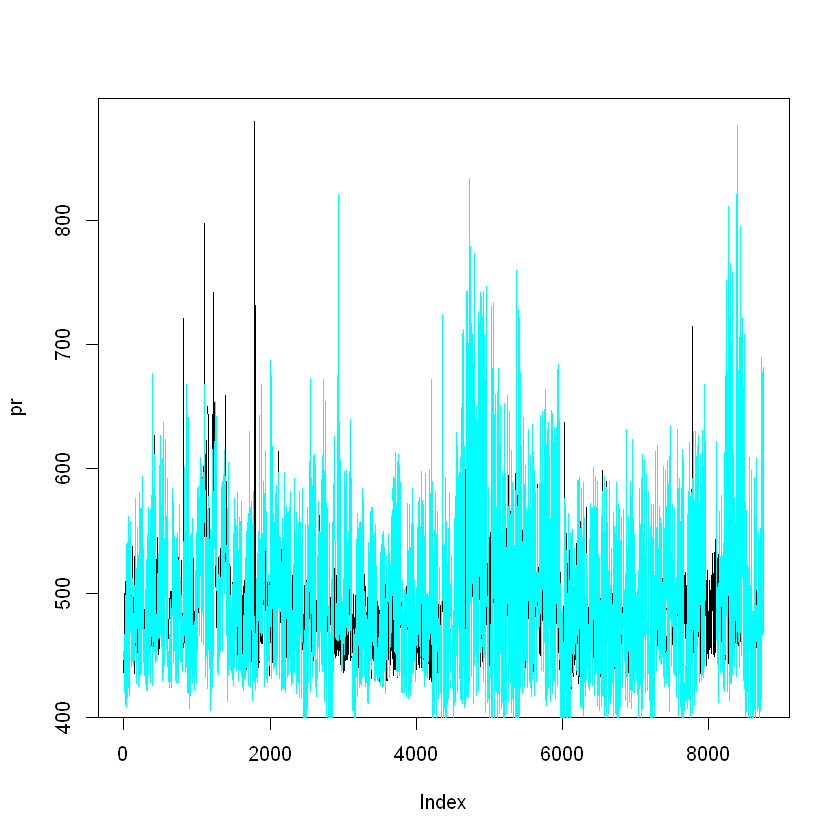

In [64]:
plot(pr,type="l")
lines(df_mod_test$co2,col="cyan")

In [65]:
#install.packages("rAmCharts")
#library("rAmCharts")
#amTimeSeries(pr_df, 'Date', c('prev', 'co2'))
#Cette représentation sera faite sur R Studio et Shiny

## Ecriture des données en disque

In [66]:
fichier_donnees=paste(DATA_PATH,DATA_FILE_OUT,sep="")
write.csv(df,fichier_donnees)